In [3]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [6]:
actions = [
    'pet',
    'heart',
    'hi'
]

data = np.concatenate([
    np.load('dataset/seq_pet_1643012694.npy'),
    np.load('dataset/seq_heart_1643012694.npy'),
    np.load('dataset/seq_hi_1643012694.npy')
], axis=0)

data.shape

(2596, 30, 100)

In [7]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2596, 30, 99)
(2596,)


In [8]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2596, 3)

In [9]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2336, 30, 99) (2336, 3)
(260, 30, 99) (260, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model2_1.0.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
69/73 [===========================>..] - ETA: 0s - loss: 10.8807 - acc: 0.6164
Epoch 00001: val_acc improved from -inf to 0.76923, saving model to models\model2_1.0.h5
73/73 [==============================] - 1s 11ms/step - loss: 10.4519 - acc: 0.6241 - val_loss: 2.9864 - val_acc: 0.7692
Epoch 2/200
70/73 [===========================>..] - ETA: 0s - loss: 3.4117 - acc: 0.7688
Epoch 00002: val_acc improved from 0.76923 to 0.79231, saving model to models\model2_1.0.h5
73/73 [==============================] - 1s 8ms/step - loss: 3.4690 - acc: 0.7697 - val_loss: 3.7180 - val_acc: 0.7923
Epoch 3/200
70/73 [===========================>..] - ETA: 0s - loss: 1.7799 - acc: 0.8473
Epoch 00003: val_acc improved from 0.79231 to 0.91538, saving model to models\model2_1.0.h5
73/73 [==============================] - 1s 9ms/step - loss: 1.7579 - acc: 0.8493 - val_loss: 0.5415 - val_acc: 0.9154
Epoch 4/200
73/73 [==============================] - ETA: 0s - loss: 0.7237 - acc: 0.9165
Epoch 0

Epoch 31/200
70/73 [===========================>..] - ETA: 0s - loss: 0.0556 - acc: 0.9929
Epoch 00031: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0565 - acc: 0.9923 - val_loss: 0.0343 - val_acc: 0.9808
Epoch 32/200
68/73 [==========================>...] - ETA: 0s - loss: 0.0621 - acc: 0.9894
Epoch 00032: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0617 - acc: 0.9893 - val_loss: 0.1182 - val_acc: 0.9500
Epoch 33/200
70/73 [===========================>..] - ETA: 0s - loss: 0.0696 - acc: 0.9937
Epoch 00033: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0703 - acc: 0.9927 - val_loss: 0.0171 - val_acc: 1.0000
Epoch 34/200
67/73 [==========================>...] - ETA: 0s - loss: 0.0877 - acc: 0.9781
Epoch 00034: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0844 - acc: 0.97

Epoch 63/200
71/73 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 1.0000
Epoch 00063: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 8ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 64/200
71/73 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 1.0000
Epoch 00064: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 65/200
71/73 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00065: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 8ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 66/200
70/73 [===========================>..] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00066: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0021 - acc: 1.00

67/73 [==========================>...] - ETA: 0s - loss: 0.0010 - acc: 1.0000  
Epoch 00094: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 95/200
70/73 [===========================>..] - ETA: 0s - loss: 9.1491e-04 - acc: 1.0000
Epoch 00095: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 9.6371e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 96/200
71/73 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00096: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 8ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 97/200
71/73 [============================>.] - ETA: 0s - loss: 8.8932e-04 - acc: 1.0000
Epoch 00097: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 8ms/step - loss: 8.9179e-04 - acc:

Epoch 126/200
71/73 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00126: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 8ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 127/200
71/73 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00127: val_acc did not improve from 1.00000

Epoch 00127: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
73/73 [==============================] - 1s 8ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 128/200
71/73 [============================>.] - ETA: 0s - loss: 8.5746e-04 - acc: 1.0000
Epoch 00128: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 8ms/step - loss: 8.6974e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 129/200
71/73 [============================>.] - ETA: 0s - loss: 9.2647e-04 - acc: 1.0000
Epoch 00129: val_acc did not imp

69/73 [===========================>..] - ETA: 0s - loss: 0.0014 - acc: 0.9991 
Epoch 00156: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.0014 - acc: 0.9991 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 157/200
73/73 [==============================] - ETA: 0s - loss: 4.3307e-04 - acc: 1.0000
Epoch 00157: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 4.3307e-04 - acc: 1.0000 - val_loss: 6.5001e-04 - val_acc: 1.0000
Epoch 158/200
70/73 [===========================>..] - ETA: 0s - loss: 3.5927e-04 - acc: 1.0000
Epoch 00158: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 3.5728e-04 - acc: 1.0000 - val_loss: 7.0552e-04 - val_acc: 1.0000
Epoch 159/200
67/73 [==========================>...] - ETA: 0s - loss: 3.6042e-04 - acc: 1.0000
Epoch 00159: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss:

Epoch 187/200
69/73 [===========================>..] - ETA: 0s - loss: 0.1184 - acc: 0.9697
Epoch 00187: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.1183 - acc: 0.9692 - val_loss: 0.0869 - val_acc: 0.9731
Epoch 188/200
72/73 [============================>.] - ETA: 0s - loss: 0.1087 - acc: 0.9727
Epoch 00188: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.1091 - acc: 0.9722 - val_loss: 0.0363 - val_acc: 0.9885
Epoch 189/200
69/73 [===========================>..] - ETA: 0s - loss: 0.1094 - acc: 0.9701
Epoch 00189: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.1102 - acc: 0.9705 - val_loss: 0.0374 - val_acc: 0.9962
Epoch 190/200
70/73 [===========================>..] - ETA: 0s - loss: 0.1459 - acc: 0.9661
Epoch 00190: val_acc did not improve from 1.00000
73/73 [==============================] - 1s 9ms/step - loss: 0.1428 - acc: 

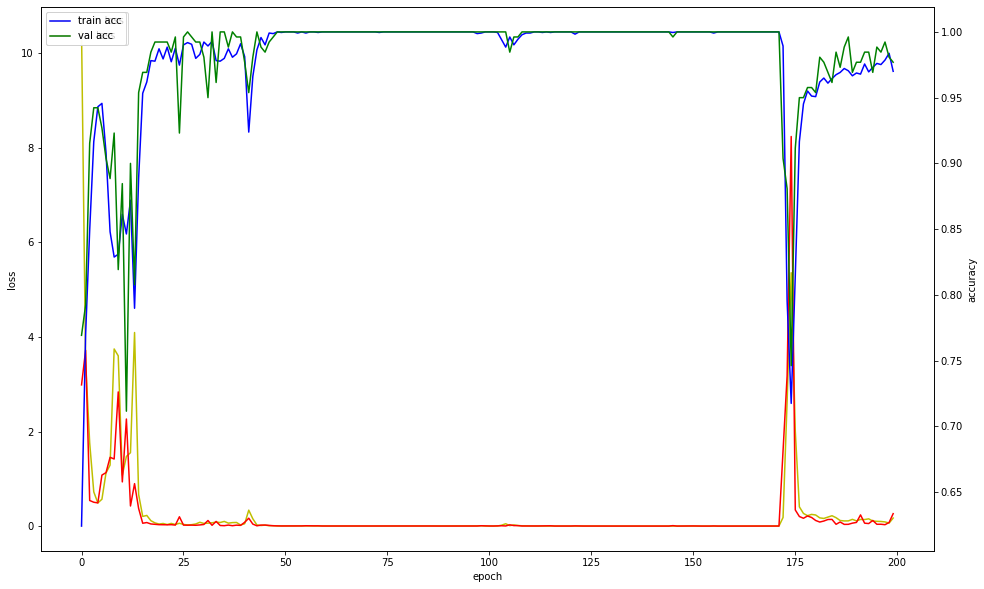

In [12]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [13]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model2_1.0.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[190,   0],
        [  0,  70]],

       [[161,   0],
        [  0,  99]],

       [[169,   0],
        [  0,  91]]], dtype=int64)